<a href="https://colab.research.google.com/github/sujinAN33/university_assignment/blob/main/%EB%8F%84%EB%AF%B8%EC%99%80%EB%B9%99%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

도미와 빙어 데이터 준비하기

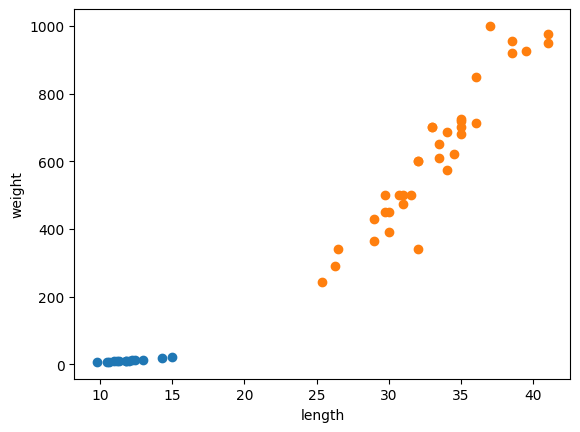

In [3]:
import matplotlib.pyplot as plt

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(smelt_length,smelt_weight)
plt.scatter(bream_length,bream_weight)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
#k-최근접 이웃 알고리즘 사용
#두 리스트 합치기
length=bream_length+smelt_length
weight=bream_weight+smelt_weight
#머신러닝 패키지 사이킷런 사용
#zip함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환한다
fish_data=[[l,w]for l,w in zip(length,weight)]
print(fish_data)



[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
#도미가 35마리이고 빙어가 14마리라는 것을 알려줌
fish_target=[1]*35+[0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
#사이킷런 패키지에서 k-최근접 알고리즘을 구현한 클래스인 kNeighborsClassifier를 임포트
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

#여기에서 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준 학습 : 훈련
#사이킷런에서는 fit()메서드가 이런 역할을 함
kn.fit(fish_data,fish_target)
#정확성평가
kn.score(fish_data,fish_target)

1.0

In [12]:
#길이와 무게 가지고 도미인지 빙어인지 예측하기
kn.predict([[30,600]])

array([1])

https://m.blog.naver.com/bestinall/221760380344

In [14]:
#참고 데이터를 49개로 한 kn49모델
kn49=KNeighborsClassifier(n_neighbors=49)
#가장 가까운 데이터 49개를 사용하는 k최근접 이웃모델에 fish_data를 적용하면
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target) #정확성이 0.7~밖에 안됨

0.7142857142857143

In [15]:
#도미가 다수이므로 모두 도미로 판단하기 때문
print(35/49)

0.7142857142857143


k최근접 알고리즘은 기본값이 5일 때 가장 가까운 5개의 데이터를 보고 다수결의 원칙에 따라 데이터를 예측한다